# CODSOFT Internship TASK 5: CREDIT CARD FRAUD DETECTION

## Brief Introduction

The dataset used for credit card fraud detection consists of anonymized features for transactions, including both legitimate and fraudulent ones. It's typically a binary classification problem where the goal is to predict whether a given transaction is fraudulent or not based on various features, such as transaction amount and time. It is highly imbalanced, with a much smaller proportion of fraudulent transactions. This makes it a challenging dataset for training predictive models. The notebook likely explores feature engineering, model selection, and evaluation techniques.

##  Importing Libraries and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


##  Exploratory Data Analysis (EDA)

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,41683.000000,41683.000000,41683.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,...,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000,41682.000000
mean,26208.345609,-0.222499,0.035454,0.711902,0.186781,-0.234719,0.099510,-0.112246,0.044579,0.193708,...,-0.028417,-0.111341,-0.040301,0.007295,0.136259,0.023199,0.008003,0.004864,89.104007,0.002591
std,12721.514541,1.855101,1.599923,1.490121,1.399707,1.387375,1.309662,1.238350,1.209428,1.220092,...,0.744449,0.638250,0.565217,0.593050,0.436860,0.504139,0.387877,0.341927,237.163503,0.050837
min,0.000000,-56.407510,-72.715728,-31.103685,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,16853.000000,-0.974000,-0.533197,0.229759,-0.719018,-0.842162,-0.638071,-0.598424,-0.151197,-0.568666,...,-0.235257,-0.533250,-0.179117,-0.324744,-0.127717,-0.329707,-0.063304,-0.006814,7.500000,0.000000
50%,31305.000000,-0.240189,0.093834,0.811276,0.185168,-0.272258,-0.156277,-0.073482,0.050183,0.071496,...,-0.074873,-0.085641,-0.051385,0.060759,0.175870,-0.064901,0.008653,0.021615,24.000000,0.000000
75%,36289.000000,1.159396,0.740067,1.443056,1.069459,0.293052,0.485883,0.432308,0.318625,0.906980,...,0.102520,0.300633,0.077243,0.400073,0.421184,0.304378,0.085015,0.076216,80.000000,0.000000
max,40784.000000,1.960497,16.713389,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,7879.420000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41683 entries, 0 to 41682
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    41683 non-null  int64  
 1   V1      41683 non-null  float64
 2   V2      41683 non-null  float64
 3   V3      41682 non-null  float64
 4   V4      41682 non-null  float64
 5   V5      41682 non-null  float64
 6   V6      41682 non-null  float64
 7   V7      41682 non-null  float64
 8   V8      41682 non-null  float64
 9   V9      41682 non-null  float64
 10  V10     41682 non-null  float64
 11  V11     41682 non-null  float64
 12  V12     41682 non-null  float64
 13  V13     41682 non-null  float64
 14  V14     41682 non-null  float64
 15  V15     41682 non-null  float64
 16  V16     41682 non-null  float64
 17  V17     41682 non-null  float64
 18  V18     41682 non-null  float64
 19  V19     41682 non-null  float64
 20  V20     41682 non-null  float64
 21  V21     41682 non-null  float64
 22

In [5]:
df.shape

(41683, 31)

In [6]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [7]:
df.duplicated().sum()

181

In [8]:
df1 = df.drop_duplicates()

In [9]:
df1.shape

(41502, 31)

<Axes: xlabel='Class', ylabel='count'>

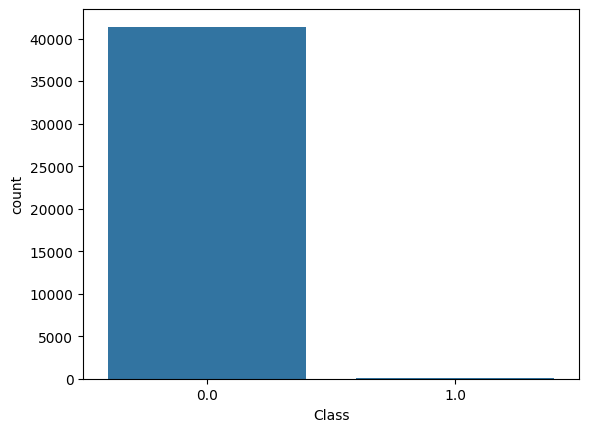

In [10]:
sns.countplot(x='Class', data=df1)

In [11]:
df1['Class'].value_counts()

,count
Class,
0.0,41393
1.0,108


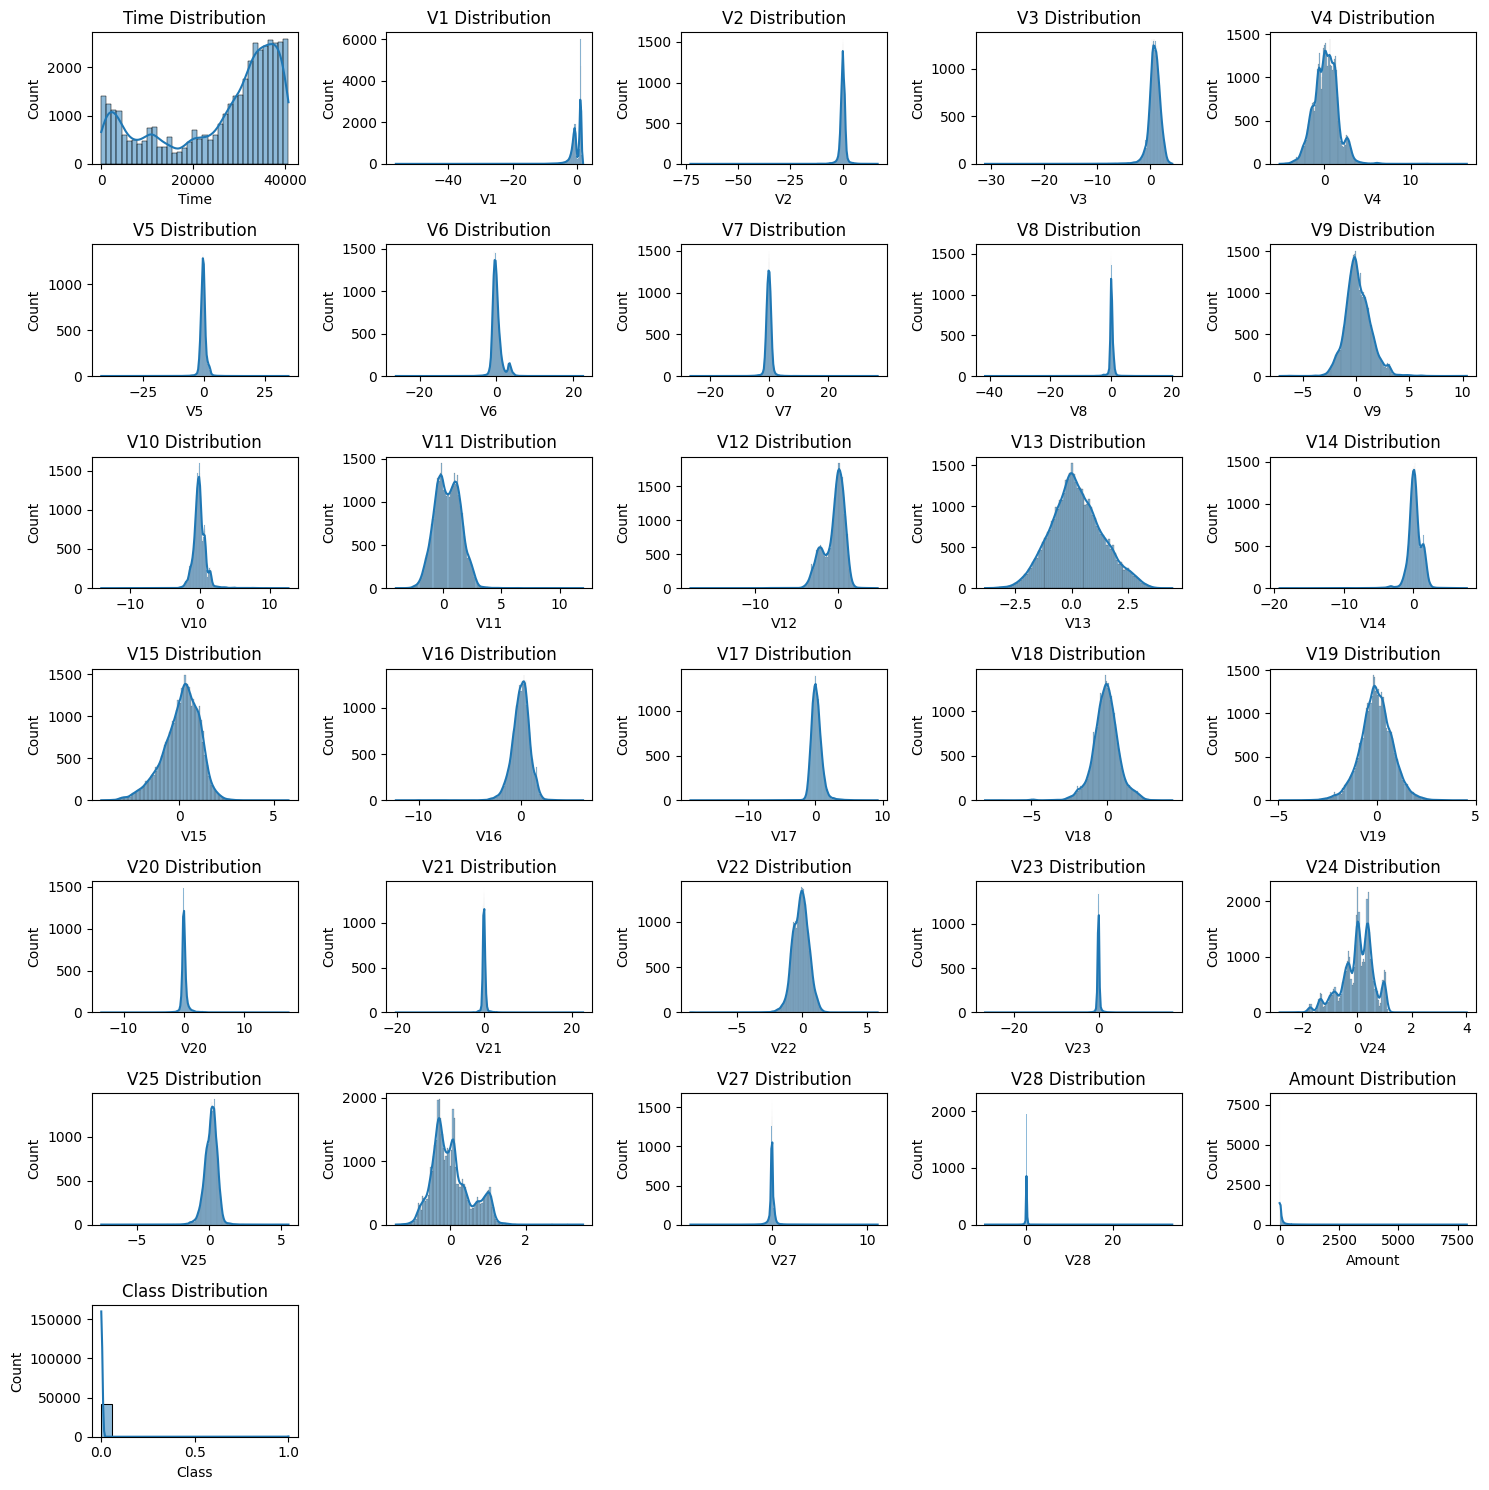

In [12]:
plt.figure(figsize=(15,15))
t = 1
for i in df1.columns:
  plt.subplot(7,5,t)
  sns.histplot(df1[i], kde= True)
  plt.title(i+' Distribution')
  t+= 1
plt.tight_layout()
plt.show()

<Axes: >

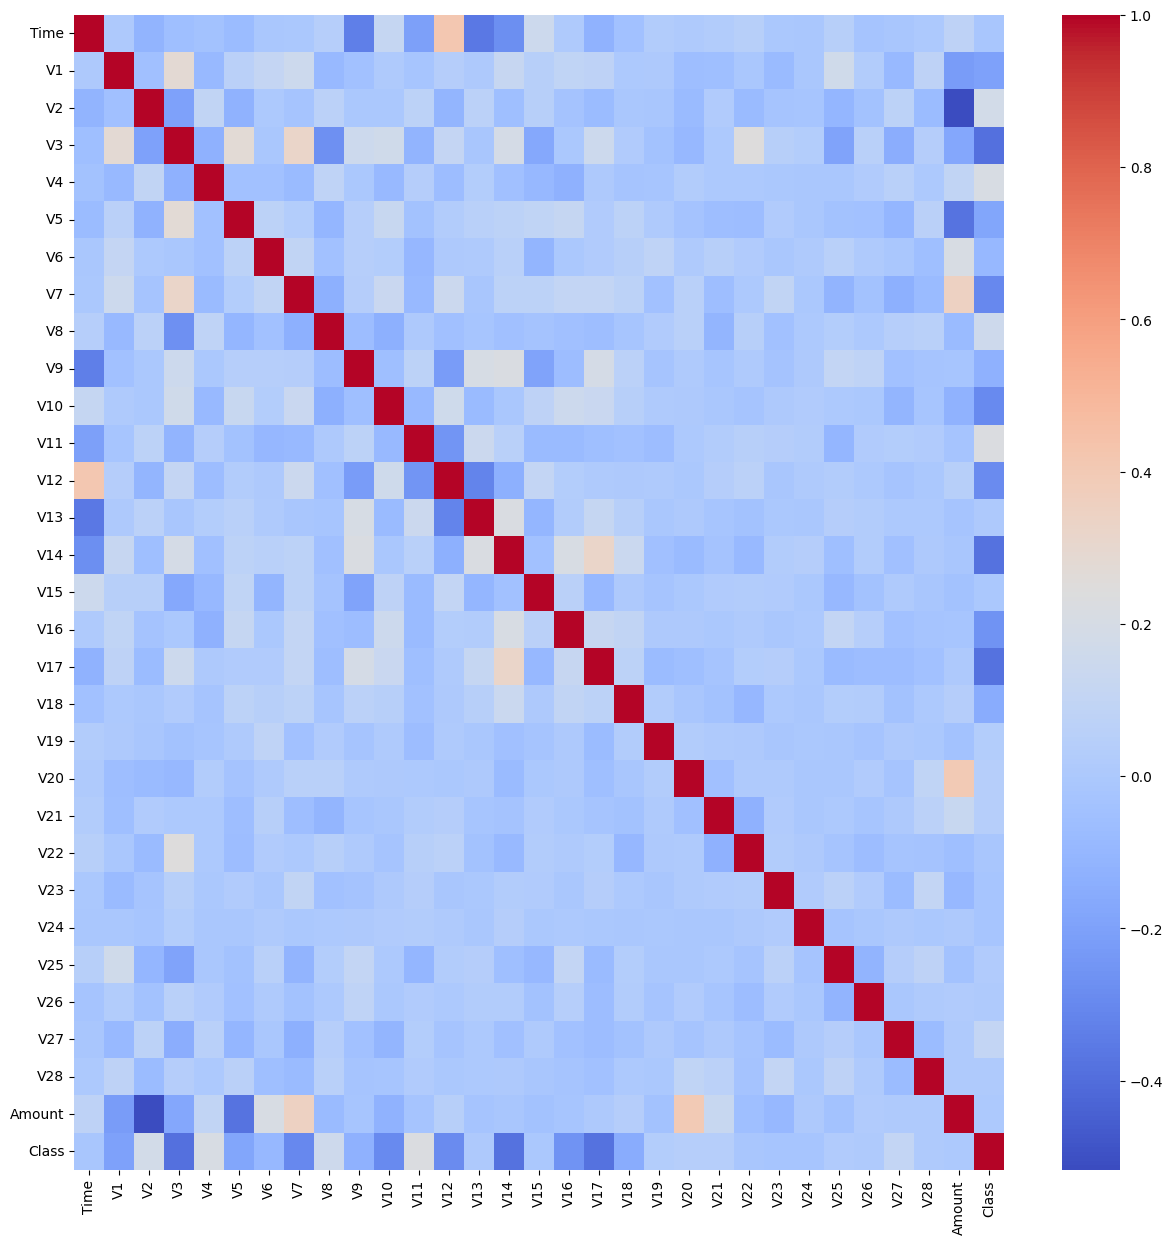

In [13]:
df_corr = df.corr()
plt.figure(figsize =(15,15))
sns.heatmap(df_corr, annot= False, cmap='coolwarm')

<Axes: >

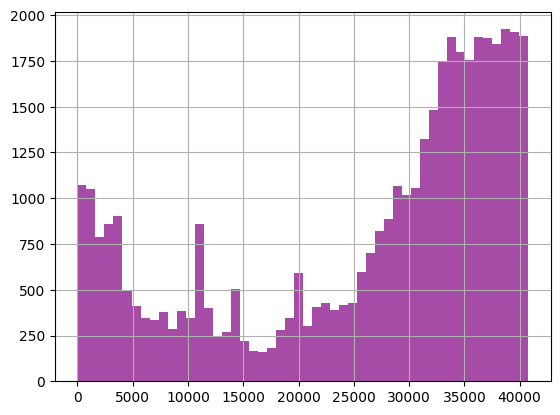

In [14]:
df['Time'].hist(bins = 50, color = 'purple', alpha = 0.7)

In [15]:
df1.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


## Data Preprocessing

In [16]:
for col in ['V24','V26','Amount']:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  l = q1 - 1.5 * iqr
  u = q3 + 1.5 * iqr
  df = df[(df[col] >= l) & (df[col] <= u)]

In [18]:
for col in ['V24','V26','Amount']:
  q1 = df1[col].quantile(0.25)
  q3 = df1[col].quantile(0.75)
  iqr = q3 - q1
  l = q1 - 1.5 * iqr
  u = q3 + 1.5 * iqr
  df1 = df1[(df1[col] >= l) & (df1[col] <= u)]

In [19]:
df1.shape

(36162, 31)

In [20]:
df1.shape

(36162, 31)

In [21]:
df1['Class'].value_counts()

,count
Class,
0.0,36064
1.0,98


In [22]:
X1 = df1.drop('Class', axis = 1)
y1 = df1['Class']

X = df.drop('Class', axis = 1)
y = df['Class']

In [23]:
df3 = df1.copy()

## 🌳 First Model

**We will apply anomaly detection using Isolation Forest (Unsupervised way!)**

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print(f"Train size: {len(y_train)}, Dev size: {len(y_dev)}, Test size: {len(y_test)}")

Train size: 29067, Dev size: 3633, Test size: 3634


In [25]:
model = IsolationForest(contamination=0.01, n_estimators=100, max_samples=0.7, random_state=42)
model.fit(X_train)

# Get anomaly scores and predictions
dev_scores = -model.decision_function(X_dev)
y_pred = model.predict(X_dev)  # -1 = anomaly, 1 = normal

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score
#Generate thresholds between min and max dev scores

thresholds = np.linspace(min(dev_scores), max(dev_scores), 100)
best_f1 = 0
best_threshold = 0

for t in thresholds:
    y_pred = (dev_scores >= t).astype(int)
    precision = precision_score(y_dev, y_pred)
    recall = recall_score(y_dev, y_pred)
    f1 = f1_score(y_dev, y_pred)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best Threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1}")

Best Threshold: 0.0970439140007438
Best F1 Score: 0.6666666666666666


In [27]:
test_scores = -model.decision_function(X_test)

# Use the best threshold to classify anomalies
final_y_pred = (test_scores >= best_threshold).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, final_y_pred))

print("Classification Report:")
print(classification_report(y_test, final_y_pred))

Confusion Matrix:
[[3617    7]
 [   4    6]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3624
         1.0       0.46      0.60      0.52        10

    accuracy                           1.00      3634
   macro avg       0.73      0.80      0.76      3634
weighted avg       1.00      1.00      1.00      3634



## 🤖 Second Model

**We will use XGBoost this time (Supervised way!)**

In [28]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb = XGBClassifier(n_estimators=100,learning_rate= 0.3 ,max_depth= 3 ,random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7247
         1.0       0.90      0.95      0.93        20

    accuracy                           1.00      7267
   macro avg       0.95      0.97      0.96      7267
weighted avg       1.00      1.00      1.00      7267



## ⚖️ Comparing Unsupervised Vs. Supervised Models

Given the heavy class imbalance in the dataset, focusing on Class 1 (Anomalies) helps assess how well the model identifies the minority class. This approach is crucial for evaluating model performance, especially in fraud detection, where detecting the smaller class (fraudulent transactions) is vital for real-world effectiveness. This evaluation can help ensure that the model isn't biased towards the majority class.

In [31]:
data = {
    "Model": ["Isolation Forest", "XGBoost"],
    "F1 Score": [0.59, 0.87]
}

df = pd.DataFrame(data)

fig = px.bar(
    df,
    x="Model",
    y="F1 Score",
    text="F1 Score",
    title="F1 Score Comparison on Test Dataset",
    labels={"F1 Score": "F1 Score", "Model": "Model"},
    color="Model",
    color_discrete_sequence=["deeppink", "turquoise"]
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    yaxis=dict(title="F1 Score", range=[0, 1]),
    xaxis=dict(title="Model"),
    title=dict(x=0.5),
    showlegend=False
)

## Conclusion

The supervised approach outperformed in terms of accuracy, but both methods have their unique advantages. The unsupervised model can identify hidden patterns not addressed in the dataset, while the supervised model is limited to predicting issues already present in the data. Both methods complement each other and could be used together for more comprehensive fraud detection systems.